In [1]:
# Using Base modules.
using Random

# Load a plotting library.
using Plots

# Load the distributions library.
using Distributions

# Load Turing and MCMCChains.
using Turing, MCMCChains

using StatisticalRethinking
using Random, Plots, MCMCChains

In [15]:
p_true = 0.5

# Iterate from having seen 0 observations to 100 observations.
Ns = 0:100;

# Draw data from a Bernoulli distribution, i.e. draw heads or tails.
Random.seed!(12)
#data = rand(Binomial(), last(Ns))
k1=50;
k2=70;
n1=100;
n2=100;

# Here's what the first five coin flips look like:
# Define a deterministic distribution
struct Determin{T<:Real} <: ContinuousUnivariateDistribution
  val::T
end
Distributions.rand(rng::AbstractRNG, d::Determin) = d.val
Distributions.logpdf(d::Determin, x::T) where T<:Real = zero(x)

##
@model infer_dif(k1,n1, k2,n2) = begin

    # Our prior belief about the probability of heads in a coin.
    θ1 ~ Beta(1, 1)
    θ2 ~ Beta(1, 1)
    δ ~ Determin(θ1-θ2) #     δ =(θ1-θ2) 
    #δ = θ1-θ2
    # The number of observations.
    N1 = length(k1)
    for j in 1:N1
        # Heads or tails of a coin are drawn from a Bernoulli distribution.
        k1[j] ~ Binomial(n1, θ1)
    end
    N2 = length(k2)
    for j in 1:N2
        # Heads or tails of a coin are drawn from a Bernoulli distribution.
        k2[j] ~ Binomial(n2, θ2)
    end
    return (δ)
end;
##
# Settings of the Hamiltonian Monte Carlo (HMC) sampler.
iterations = 5000
ϵ = 0.05
τ = 10


10

In [17]:
# Start sampling.
#chain = sample(infer_dif(k1,n1,k2,n2), HMC(ϵ, τ), iterations, progress=true);
model=infer_dif(k1,n1,k2,n2);
chain = sample(model, SMC(), 10000);

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:03


Chains MCMC chain (10000×5×1 Array{Float64,3}):

Log evidence      = -9.103595822916434
Iterations        = 1:10000
Thinning interval = 1
Chains            = 1
Samples per chain = 10000
parameters        = δ, θ1, θ2
internals         = lp, weight

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat 
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64 

           δ   -0.1990    0.0649     0.0006    0.0024   628.4094    1.0001
          θ1    0.5003    0.0480     0.0005    0.0018   611.1213    1.0004
          θ2    0.6992    0.0426     0.0004    0.0016   658.0400    0.9999

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           δ   -0.3300   -0.2419   -0.1988   -0.1568   -0.0656
          θ1    0.3978    0.4725    0.5007    0.5281    0.5924
          θ2    0.6109    0.6721    0.7011    0.7290    0.7782


HPD
  parameters     lower     upper 
      Symbol   Float64   Float64 

           δ   -0.3321   -0.0732
          θ1    0.3952    0.5882
          θ2    0.6130    0.7792


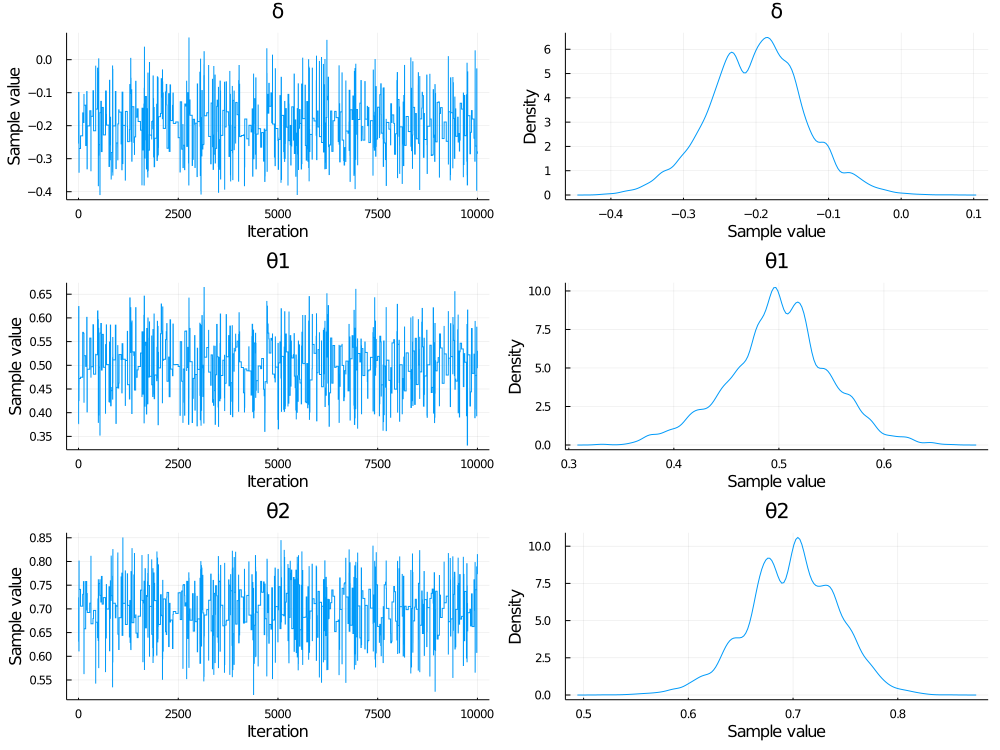

In [18]:
results = generated_quantities(model, chain)
p_summary = chain[:δ]
p_grid = range(-1, step=0.001, stop=1)
v1 = sum(p_summary[filter(i -> p_grid[i] < 0.5, 1:length(p_grid))])
v2 = sum(p_summary[filter(i -> p_grid[i] < 1, 1:length(p_grid))])
#display(plot(p_summary, seriestype = :histogram))
display(chain)
display(hpd(chain))
plot(chain)

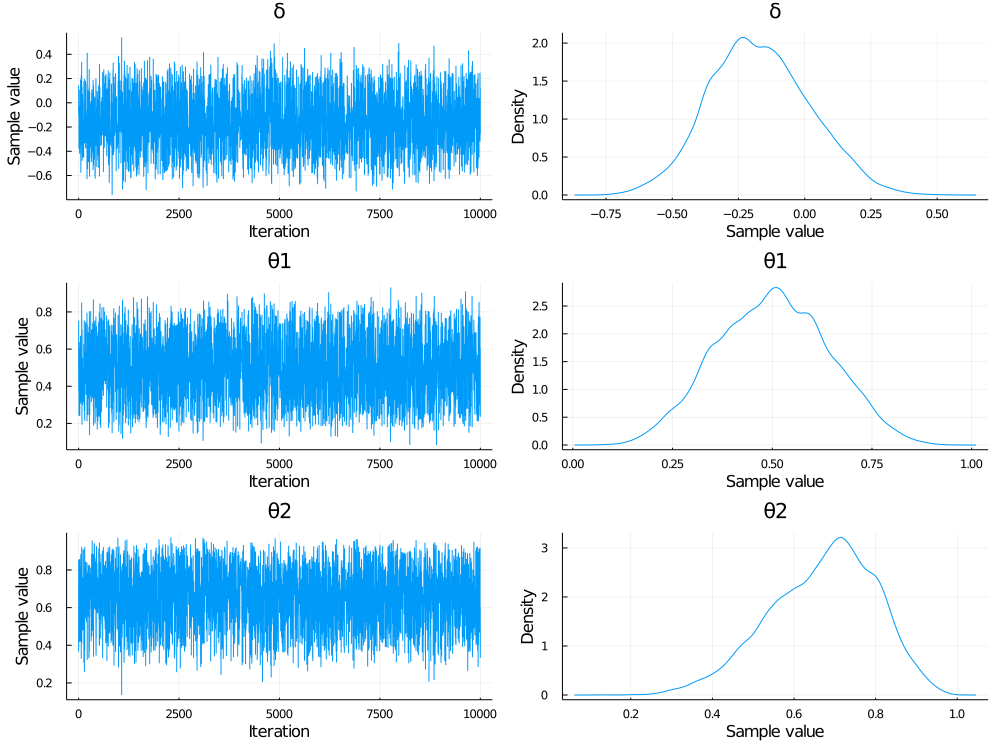

In [14]:
plot((chain))